# An introduction to TensorFlow

<div align="center">
  <img src="https://www.tensorflow.org/images/tf_logo_social.png">
</div>

[TensorFlow](https://www.tensorflow.org/) is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

TensorFlow was first released in 2015.

In September 2019, TensorFlow 2.0 was released, with significant changes with respect to TensorFlow 1.0 (codes are not backward compatible!).

The current stable version in 2.4 (as to December 2020).

- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- [Python reference](https://www.tensorflow.org/api_docs/python/tf)


### Introduction


To import tensorflow libarary is necessary to run this cell. We also import numpy library which will be helpful in this tutorial. 

In [ ]:
import tensorflow as tf
import numpy as np

To know what is the version of Tensorflow we are working with we can run the following 

In [ ]:
print(tf.__version__)

2.4.1


### Tensors

Tensors generalize the concept of matrix and they are very usefeful when we  deal with unstrctured data such as images. In Tensorflow we can define tensors of different ranks as follow

In [ ]:
## tensor of rank 0
rank_0_tensor = tf.constant([4],shape=[], dtype=tf.float16)
# rank_0_tensor = tf.constant(4 , dtype=tf.float16)  
print(rank_0_tensor)

## tensor of rank 1
rank_1_tensor = tf.constant([2.0, 3.0, 4.0], shape=[3,], dtype=tf.float16) 
#rank_1_tensor = tf.constant([2.0, 3.0, 4.0], dtype=tf.float16)
print(rank_1_tensor)

## tensor of rank 2
rank_2_tensor = tf.constant([[1, 2] , [3,4] , [5, 6]], dtype=tf.float16)
#rank_2_tensor = tf.constant([1, 2, 3, 4 ,5, 6], shape=[3,2], dtype=tf.float16)
print(rank_2_tensor)

## tensor of rank 3
rank_3_tensor = tf.constant([[[0, 1, 2, 3, 4],[5, 6, 7, 8, 9]],[[10, 11, 12, 13, 14],[15, 16, 17, 18, 19]], [[20, 21, 22, 23, 24], [25, 26, 27, 28, 29]],])
#rank_3_tensor = tf.constant([0, 1, 2, 3, 4,5, 6, 7, 8, 9,10, 11, 12, 13, 14,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],shape=[3,2,5], dtype=tf.float16)
print(rank_3_tensor)

tf.Tensor(4.0, shape=(), dtype=float16)
tf.Tensor([2. 3. 4.], shape=(3,), dtype=float16)
tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)
tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


We can also convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method

In [ ]:
np.array(rank_2_tensor)
#rank_2_tensor.numpy() 

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

It is also possible to perform basic operations among tensor like:
*   Element-wise addition
*   Element-wise multiplication
*   Tensor product




In [ ]:
tensor1 = tf.constant([[1, 6],[3, 2]])
tensor2 = tf.constant([[2, 1],[1, 2]]) 

# element-wise addition
tensor_sum = tf.add(tensor1, tensor2)
# tensor_sum = tensor1 + tensor2
print(tensor_sum, "\n")

# element-wise multiplication
tensor_mult = tf.multiply(tensor1, tensor2)
#tensor_mult = tensor1 * tensor2
print(tensor_mult, "\n")

# tensor product
tensor_prod = tf.matmul(tensor1, tensor2)
#tensor_prod = tensor1 @ tensor2
print(tensor_prod, "\n")

tf.Tensor(
[[3 7]
 [4 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[2 6]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 8 13]
 [ 8  7]], shape=(2, 2), dtype=int32) 



We can provide simple operation on a single tensor like


In [ ]:
tensor3 = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_mean(tensor3), "\n")

# Find the index of the largest value
print(tf.argmax(tensor3), "\n")

# Compute the softmax
print(tf.nn.softmax(tensor3), "\n")

tf.Tensor(5.0, shape=(), dtype=float32) 

tf.Tensor([1 0], shape=(2,), dtype=int64) 

tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32) 



### Gradient tapes

TensorFlow provides the [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually `tf.Variable`s.
TensorFlow "records" relevant operations executed inside the context of a `tf.GradientTape` onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation

Here is a simple example:

In [ ]:
x = tf.Variable(15.0)

with tf.GradientTape() as tape:
  y = x**2


Once recoreded the previous operation with `GradientTape.gradient(target, sources)` it is possible to compute the gradient of the previous target function (usually the loss function) with respect to its variables (often the model's weights).

In [ ]:
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(30.0, shape=(), dtype=float32)


The above example uses scalars, but `tf.GradientTape` works as easily on any tensor:

In [ ]:
w = tf.Variable(tf.random.normal((3, 1)), name='w')
b = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b 
  loss = y**2

To get the gradient of y with respect to both variables, you can pass both as sources to the gradient method. 

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w, "\n")

print(dl_dw, "\n")
print(dl_db, "\n")

<tf.Variable 'w:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.67637247],
       [-1.925347  ],
       [-0.12430006]], dtype=float32)> 

tf.Tensor(
[[ -9.7999325]
 [-19.599865 ]
 [-29.399797 ]], shape=(3, 1), dtype=float32) 

tf.Tensor([-9.7999325], shape=(1,), dtype=float32) 



## ANN in Tensorflow

In this Section we will present how to implement and train from scratch an ANN in Tensorflow in order to classify images belongning to different classes. In particular we will present how to work with a real dataset, containing images belonging to different types of garbage. It is possible to download the dataset at the following [link](https://www.kaggle.com/asdasdasasdas/garbage-classification)


### Dataset preparation

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt             
from PIL import Image
from sklearn.utils import shuffle           

If we are working on Google Colab we have also to run this cell  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Set the directory of the dataset or, if you are working in Colab, you can run this

In [ ]:
# Google Colab
!unzip '/content/drive/My Drive/garbage_dataset.zip'
dataset="/content/garbage_dataset"

# Local device -> Put the directory of the dataset
# dataset= " ... "

unzip:  cannot find or open /content/drive/My Drive/garbage_dataset.zip, /content/drive/My Drive/garbage_dataset.zip.zip or /content/drive/My Drive/garbage_dataset.zip.ZIP.


Before to procede we have the define a vector containing the 6 images' categories 




In [ ]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

We have now to import the images. To do so we can use the `PIL` library available in Python. We will not go trough all the technical details of the code below since it is not the purpose of this tutorial, the only thing we just outline is the fact we finally get a dataset containing all the images as an array and their respective label as a categotical value.

In [ ]:
# Size of images we want to train
img_h = 64
img_w = 64

images = []
labels = []

# Iterate through each folder corresponding to a category
for folder in os.listdir(dataset):
  label = class_names_label[folder]
  
  # Iterate through each image in our folder
  for file in os.listdir(os.path.join(dataset, folder)):
      
      # Get the path name of the image
      img_path = os.path.join(os.path.join(dataset, folder), file)
      
      # Open and resize the img
      img=Image.open(img_path).convert('RGB')
      img=img.resize((img_h,img_w))
      img_array=np.array(img)
      
      # Append the image flattened and its corresponding label to the output
      images.append(img_array.flatten())
      labels.append(label)


Before to procede we remark the fact that all images in our dataset have different sizes and so we had to reshape all of them. This is usually a critical point in image classification task indeed a too low resolution image may not give the expexted results while a too high resolution image may require too much time to the network to be trained without a significan improvement in the results

Before to procede we have to one-hot encode the labels and cast images into float arrays. After that we can shuffle the whole dataset in order to split in fair way the training, the validation and the test set







In [ ]:
images = np.array(images, dtype = 'float32')
labels= tf.keras.utils.to_categorical( np.array(labels, dtype = 'int32')  ) 
images, labels = shuffle(images, labels, random_state=25)


At this point we will split the data into training, validation and tes set. The 70 % of the total images will be part of the training set, the 15% of the validation set and the last 15% of the test set.

In [ ]:
train_images, train_labels = images[:1769], labels[:1769] 
valid_images, valid_labels = images[1769:2148], labels[1769:2148]
test_images, test_labels = images[2148:], labels[2148:]

n_train = train_labels.shape[0]
n_valid = valid_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of validation examples: {}".format(n_valid))
print ("Number of test examples: {}".format(n_test))

Number of training examples: 1769
Number of validation examples: 379
Number of test examples: 379


Before training the network is usually a good procedure standardize the input's features. Since we are dealing with RGB channel whose values are in the range [0, 255] we will rescale all images dividing by 255, mapping the original pixel's values to the interval [0,1].

In [ ]:
train_images = train_images / 255.0 
valid_images = valid_images / 255.0 
test_images = test_images / 255.0 

### ANN implementation

As a first thing to implement an ANN from scratch we have to define a function which inizialize the weights and the bias of a general layer. This function will recieve as input the number of neurons, the size of the input and the name of the layer we are bulding and will return as output the inizialization of both the weights and the bias vector. It is important to note that the function will inizialize the bias vector equal to the null vector, while the weights matrix will be sampled from a gaussian distribution with null mean and standard deviations equal to one divided by the number of inputs. This is usally done to mitigate problems which affects the NN training.


In [ ]:
def layer(inputs,neurons,layer_name):
   weights = tf.Variable(tf.random.normal((inputs.shape[1],neurons), stddev = 1/neurons ))
   bias = tf.Variable(tf.zeros([neurons]))
   return weights,bias

Once we have implemented the layer function we can implent the one which actually build the network. This function will take the input vector and a list containg the number of neurons per layers and will return as output a list containg all the weights of the network.



In [ ]:
def create_network(X,layers):
    network = []
    variables = []
    previous = X
    for ix, neurons in enumerate(layers):
        weights,bias = layer(previous,neurons,f'layer_{ix}')    
        network.append( (weights,bias) )
        variables.extend( (weights,bias) )
        previous = weights
    return network, variables

In order to be able to compute the the output of the network (actually its prediction) we have to define the following two functions. The function *network_logits* will multpliy the input by the weights of each layer adding the bias itertively and will provide as output a vector containg the [logits](https://en.wikipedia.org/wiki/Logit) of each class. While the function *prediction* will take as input the logits provided by the previous function in order to apply it the [softmax function](https://en.wikipedia.org/wiki/Softmax_function).

In [ ]:
def network_logits(X):
    net = X
    layer = 1
    for weights,bias  in network[:-1]:     
        with tf.name_scope(f'Layer_{layer}'): 
            net = tf.add(tf.matmul(net, weights), bias,name='net')
            net = tf.nn.leaky_relu(net, name="relu")
        layer += 1
    weights,bias = network[-1]
    with tf.name_scope('Output'): 
        net = tf.add(tf.matmul(net, weights), bias)
    return net

def predict(X):
    logits = network_logits(X)
    return tf.nn.softmax(logits)

We have also to define a loss which is coherent with the problem we are dealing with. Since we are facing a multi classification problem we will use the Softmax cross entropy loss. We can import it directly from tensorflow with `tf.nn.softmax_cross_entropy_with_logits`.

In [ ]:
def loss(X,Y):
    logits = network_logits(tf.constant(X.astype(np.float32)))
    target_Y = tf.constant(Y.astype(np.float32))    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target_Y, logits=logits))
    return loss

Thanks to `tf.GradientTape`, as seen before, we can implement the function *grad* which returns the gradient of the loss function, with respect each one of the weights present in the network, evaluated in the function's input vector

In [ ]:
def grad(X, Y):
    with tf.GradientTape() as tape:        
        loss_val = loss(X,Y)
    return tape.gradient(loss_val,variables)

We can also define the function *accuracy* which take as input the real target values and the predicted one, giving as output the percentage of correct predictions

In [ ]:
def accuracy(X,Y):
    pred_Y = predict(tf.constant(X.astype(np.float32))).numpy()
    pred_Y = np.argmax(pred_Y,axis=1)
    target_Y = np.argmax(Y,axis=1)
    return np.sum(pred_Y == target_Y)/len(Y)

When we train a Neural Network is also important to add some regularization techniques aimed to prevent overfitting. One of the most important is the so called "Early Stopping", which stops the training of a Network when its validation error start to increase (meaning that the network is just adapting to the data). In this tutorial we have presented a possible implementation of it, in any cae, it also possible to use the one provided by keras as we will see in next chapter

In [ ]:
def early_stopping(val_loss,pt,epoch):
  if (epoch>2*pt):
    start=np.mean(val_loss[-2*pt:-pt])
    end=np.mean(val_loss[-pt:])

    if (start-end>=0):
      return True
    else:
      print("Train stopped by Early Stopping at epoch",epoch)
      return False
  return True

### Tensorboard

Tensorboard allows to see interactive statistics produced during the NN training. To use it we need to create a log folder containg log subfolders named with the current timestep in a way that, each time we run the code, Tensorboard will save the log file in the respective one.

In [ ]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "log"
log_dir = "{}/softmax-{}/".format(root_logdir, now)

The function *create_graph* will call the previous implented functon *predict* and will take trace of all the computations to finally build the compete graph in Tensorflow. This is made possible by the fact that the function is decorated by `@tf.function`. While the function *write_graph* function will save this trace in Tensorboard. 



In [ ]:
@tf.function
def create_graph(X):    
    _ = predict(X)

def write_graph(X,writer):
    tf.summary.trace_on(graph=True)
    create_graph(tf.constant(X.astype(np.float32)))
    with writer.as_default():
        tf.summary.trace_export(name="trace",step=0)

### ANN Training

We have now to select the hyper parameters which characterize the network and the way it is trained. The principal hyper parameters involved in the model selction phase are usually: 

*   the number of neurons in each hidden layer (and their activaction function which, in our case, have alredy been set equal to the leaky relu)
*   the choice of the otimizer
*    the learning rate and, in case, the momentum 
*   the number of epochs
*   the batch size




In [ ]:
# number of neurons belonging to each layer 
# the last layer must have 6 neuros since we have 6 class to predict
layers = [256,128,32,16,6]

network,variables = create_network(train_images,layers)

# write_graph  
writer = tf.summary.create_file_writer(log_dir)
write_graph(train_images,writer)

# learning rate
learning_rate = 0.001

# batch size
batch_size = 64

# number of epochs
num_epochs = 150

# choice of the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum = 0.9)
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

To train the network we have to iterate over the number of epochs we have chosen. At each epoch evry batch of the dataset is presented randomly to the network in order to compute the gradient of the loss function with respect each one of its weights, thanks to the *grad* function we have defined above. Then we will be able to update the weights with the optimizer we have previously defined. 

In [ ]:
# number of features
num_features =  train_images[0].shape

# number of target labels
num_labels = 6

shuffled = np.arange(train_images.shape[0])

# Early Stopping and Patience
es = True
pat=20

train_error=[]
valid_error=[]
train_acc=[]
valid_acc=[]

for epoch in range(num_epochs):  
  if (es == True):  
    np.random.shuffle(shuffled)
    offset = 0
    while offset<train_images.shape[0]-batch_size:
        batch_X = train_images[shuffled[offset:offset+batch_size]]
        batch_Y = train_labels[shuffled[offset:offset+batch_size]]            
        gradients = grad(batch_X, batch_Y)              
        optimizer.apply_gradients(zip(gradients, variables))                    
        offset += batch_size
    train_error.append(loss(train_images,train_labels))
    valid_error.append(loss(valid_images,valid_labels))
    train_acc.append(accuracy(train_images,train_labels))
    valid_acc.append(accuracy(valid_images,valid_labels))
    with writer.as_default():
        tf.summary.scalar('Train error', train_error[epoch], step=epoch)
        tf.summary.scalar('Validation error', valid_error[epoch], step=epoch)
        tf.summary.scalar('Train accuracy', train_acc[epoch], step=epoch)
        tf.summary.scalar('Validation accuracy', valid_acc[epoch], step=epoch)
    print("Validation Loss:",np.array(valid_error[epoch]),"Train Loss:",np.array(train_error[epoch]),"Validation accuracy:",train_acc[epoch])
    es=early_stopping(valid_error, pat, epoch )
writer.close()



Validation Loss: 1.7876922 Train Loss: 1.7878348 Validation accuracy: 0.21989824759751272
Validation Loss: 1.7819513 Train Loss: 1.7823025 Validation accuracy: 0.22385528547201808
Validation Loss: 1.776827 Train Loss: 1.777349 Validation accuracy: 0.23403052572074617
Validation Loss: 1.7722077 Train Loss: 1.7728792 Validation accuracy: 0.22385528547201808
Validation Loss: 1.7680826 Train Loss: 1.76887 Validation accuracy: 0.25494629734313173
Validation Loss: 1.7642204 Train Loss: 1.765203 Validation accuracy: 0.2532504239683437
Validation Loss: 1.7607728 Train Loss: 1.7618871 Validation accuracy: 0.2459016393442623
Validation Loss: 1.757611 Train Loss: 1.7588943 Validation accuracy: 0.23176936122102884
Validation Loss: 1.7546098 Train Loss: 1.756058 Validation accuracy: 0.2091577162238553
Validation Loss: 1.7517489 Train Loss: 1.7534398 Validation accuracy: 0.22385528547201808
Validation Loss: 1.7492937 Train Loss: 1.7511044 Validation accuracy: 0.22272470322215943
Validation Loss: 1.7

To visualize the evolution of the Loss during training we can run the following. (In the same way we can provide a plot of the accuracy)

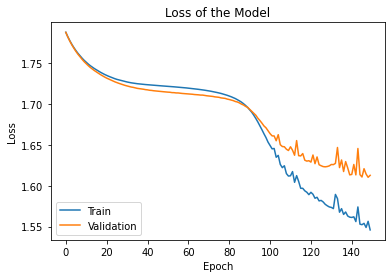

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_error)
plt.plot(valid_error)
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

Or we can visulalize the interactive plots produced by TensorBoard. Running the following code we will be able to visualize the Training and Validation Accuracy/Loss and the graph of the network. If you are working in colab you can run this, otherwise you can digit in a shell console in you working folder the following : tensorboard --logdir log.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir log

The final accuracy on the test set is given by the following. Note that the results are not so good as expected. In Next chapter we will see other network's architectures able to better perform in this framework

In [ ]:
print("The final accuracy on the test set is eqal to:", accuracy(train_images,train_labels))

The final accuracy on the test set is eqal to: 0.39174674957603167


# An introduction to Keras

<div align="center">
  <img src="https://keras.io/img/logo.png">
</div>

[Keras](https://keras.io/) is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.
Up until version 2.3 Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, R, Theano, and PlaidML. As of version 2.4, only TensorFlow is supported. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. 



In [ ]:
from tensorflow import keras

## Convolution Neaural Networks 

One of the main advantages of the Keras library is that we can easily build an ANN. Since we are dealing with an image classification problem, the typical architecture used in such a framework is the convolutional one. We are going to present how to implent it using the two differnt API provided by Keras: Functional and Sequential. Before going on with the implementation we will briefly present the typical architecture of a CNN which is usually made by two main parts: 

*   The first part is the one aimed to extract the most important features of the images. In this part we usually stack differnt convolutional block made by Convolution non linear and Pooling layers. 

*   The second part is aimed to classify in a correct way the feaures which come from the Convolutional part. This part of the network is made by Fully connected layers followed by a final softmax layers having a number of neurons equal to the number of classes we have in the dataset.

We can finally import from Keras all the classes in order to build these layers


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input

### Dataset preparation

Also in this case we have to import the dataset with the only difference that now we are not required to flatten each image into a vector since we will consider them as three channels tensors.  

In [ ]:
import os
import matplotlib.pyplot as plt             
from sklearn.utils import shuffle 

In [ ]:
# Enumerate the and label the classes
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

# Image size
img_h=128
img_w=128

# Create two different lists containg the images and the labels of the dataset 
images = []
labels = []

# Iterate through each folder corresponding to a category
for folder in os.listdir(dataset):
  label = class_names_label[folder]
  
  # Iterate through each image in our folder
  for file in os.listdir(os.path.join(dataset, folder)):
      
      # Get the path name of the image
      img_path = os.path.join(os.path.join(dataset, folder), file)
      
      # Open and resize the img
      img=Image.open(img_path).convert('RGB')
      img=img.resize((img_h,img_w))
      img_array=np.array(img)
      
      # Append the image and its corresponding label to the output
      images.append(img_array)
      labels.append(label)

Once we have imported the dataset we can run the following to check if everything has been done correctly 

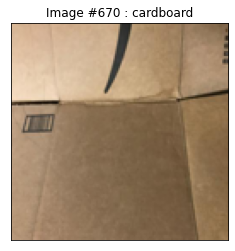

In [ ]:
index = np.random.randint(len(labels))
plt.figure()
plt.imshow(images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[labels[index]])
plt.show()

We have also to cast, shuffle and finally standardize images has we have done before

In [ ]:
# Shuffle the Dataset
images, labels = shuffle(images, labels, random_state=25)

# One-hot encode the features
images = np.array(images, dtype = 'float32')
labels =tf.keras.utils.to_categorical( np.array(labels, dtype = 'int32')  ) 

# Images normalization 
images = images / 255.0 

We can finally split the data into training, validation and tes set. The 70 % of the toal images will be part of the training set, the 15% of the validation set and the last 15% of the test set as done before.

In [ ]:
train_images, train_labels = images[:1769], labels[:1769] 
valid_images, valid_labels = images[1769:2148], labels[1769:2148]
test_images, test_labels = images[2148:], labels[2148:]

### Keras Sequential models 

Sequential API is the easiest model to create a Neural Network in Keras. With a sequential model we can build a network layer by layer. First of all we need to import from `keras.models` the `Sequential` one 


In [ ]:
from keras.models import Sequential

Then we can build the Convolution Neurl Network model stacking layer by layer following the sheme presented before

In [ ]:
# Create the sequential model stacking all the layers of the Neural  Network
model_s =  keras.models.Sequential()

# Features extraction -> Convolutional part

model_s.add(Conv2D(32, (3,3), padding='same', name='layer1',input_shape=(img_h,img_w,3)))
model_s.add(BatchNormalization())
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_s.add(Dropout(0.2))

model_s.add(Conv2D(64, (3,3), padding='same', name='layer2'))
model_s.add(BatchNormalization())
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_s.add(Dropout(0.2))

model_s.add(Conv2D(128, (3,3), padding='same', name='layer3'))
model_s.add(BatchNormalization())
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_s.add(Dropout(0.2))

model_s.add(Conv2D(256, (3,3), padding='same', name='layer4'))
model_s.add(BatchNormalization())
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_s.add(Dropout(0.2))

# Classification -> FC part
model_s.add(Flatten())
model_s.add(Dense(512))
model_s.add(Activation("relu"))
model_s.add(BatchNormalization())
model_s.add(Dropout(0.5))
model_s.add(Dense(6))
model_s.add(Activation("softmax"))

model_s.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_35 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_42 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_36 (Batc (None, 64, 64, 64)       

We can now compile the model. To do so we have to specify the loss function, the optimizer and the validation metrics we need to use to train the network. Keras provides many possibilities concerning the last three choices. In particular we can find all of the available possibilities at the following links:
*  [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
*  [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*  [validation metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

Note that for a Multi Classification problem we need to use a Categorical Crossentropy loss, while we have more freedom to choose the optimizer (and its learning rate) and the validation metrics. In this tutorial we will presnt a common choice in classification probems.








In [ ]:
# Choice of the Loss function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Learning rate and Optimizer
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['accuracy']

# Compile Model
model_s.compile(optimizer=optimizer, loss=loss, metrics=metrics)

We can finally fit the model to the data with `tf.keras.model.fit`. At this point we have to specify both the batch size and the number of epochs we want during the training. We can also add some regularization techinques to prevent overfitting like early stopping. To do that we need to add to the callbacks list the following: `tf.keras.callbacks.EarlyStopping`. 

In [ ]:
# Batch size
bs=64

# Number of Epochs
epoch=50

# List of callbacks
callbacks = []

# Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
callbacks.append(es_callback)


# Fit Model 
history = model_s.fit(train_images, 
                      train_labels, 
                      validation_data=(valid_images, valid_labels),
                      batch_size=bs,
                      epochs=epoch,
                      callbacks=callbacks)

Epoch 1/50
28/28 [==============================] - 2s 73ms/step - loss: 1.1597 - accuracy: 0.5879 - val_loss: 2.2431 - val_accuracy: 0.2111
Epoch 2/50
28/28 [==============================] - 2s 71ms/step - loss: 1.1374 - accuracy: 0.6066 - val_loss: 2.3571 - val_accuracy: 0.2111
Epoch 3/50
28/28 [==============================] - 2s 71ms/step - loss: 1.0505 - accuracy: 0.6410 - val_loss: 2.2457 - val_accuracy: 0.2111
Epoch 4/50
28/28 [==============================] - 2s 71ms/step - loss: 1.0151 - accuracy: 0.6529 - val_loss: 2.3128 - val_accuracy: 0.2111
Epoch 5/50
28/28 [==============================] - 2s 72ms/step - loss: 0.9671 - accuracy: 0.6580 - val_loss: 2.3425 - val_accuracy: 0.2111
Epoch 6/50
28/28 [==============================] - 2s 71ms/step - loss: 0.9473 - accuracy: 0.6721 - val_loss: 2.0992 - val_accuracy: 0.2533
Epoch 7/50
28/28 [==============================] - 2s 72ms/step - loss: 0.8796 - accuracy: 0.6936 - val_loss: 2.3033 - val_accuracy: 0.2164
Epoch 8/50
28

To visualize the training/validation loss (or accuracy) during the training we can run the follow 

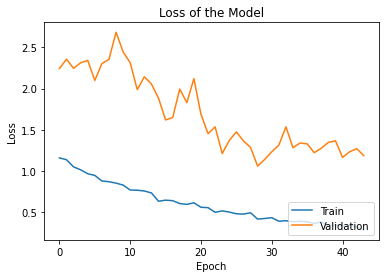

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

While to have a more clear iformation concerning the goodness of fit of the Network we can run the follow which computes the principal statisctics on the test set

In [ ]:
from sklearn.metrics import classification_report

Y_prediction = model_s.predict(test_images)
Y_pred_classes = np.argmax(Y_prediction,axis=1) 
Y_true = np.argmax(test_labels,axis=1)
class_report = classification_report(Y_true, Y_pred_classes, 
                                     target_names=class_names)
print(class_report)

              precision    recall  f1-score   support

   cardboard       0.74      0.86      0.80        57
       glass       0.62      0.26      0.37        69
       metal       0.48      0.54      0.51        54
       paper       0.98      0.49      0.65       111
     plastic       0.44      0.85      0.58        66
       trash       0.39      0.73      0.51        22

    accuracy                           0.59       379
   macro avg       0.61      0.62      0.57       379
weighted avg       0.68      0.59      0.58       379



To save the weights of the model we have just trained we can run the following if we are working in Colab

In [ ]:
model_s.save('/content/drive/My Drive/ADNE/models/CNN.h5')

### Keras Functional model

Functiona API presents a lot of advantages with respect the Sequential one since, in principle, a part of the input can comunicate with the final output so that it is possible to build more complex Networks. To build a Functional model we will use `tensorflow.keras.models.Model` and we will provide it both the input vector propagated trough all the network and the final output.

In [ ]:
from tensorflow.keras.models import Model

Our Functional model will be given by 

In [ ]:
input = Input(shape=(img_h,img_w,3), name='input')

layer = Conv2D(32, (3,3), padding='same', name='layer1')(input)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D(pool_size=(2, 2), padding='same')(layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(64, (3,3), padding='same', name='layer3')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D(pool_size=(2, 2), padding='same')(layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(128, (3,3), padding='same', name='layer5')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D(pool_size=(2, 2), padding='same')(layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(256, (3,3), padding='same', name='layer6')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D(pool_size=(2, 2), padding='same')(layer)
layer = Dropout(0.2)(layer)

layer = Flatten()(layer)

# Classifier -> Fully connected part
features = tf.keras.layers.Flatten(name='features')(layer)
layer = tf.keras.layers.Dense(512)(features)
layer = tf.keras.layers.Activation("relu")(layer)
layer = tf.keras.layers.BatchNormalization()(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(6)(layer)
output = tf.keras.layers.Activation("softmax")(layer)

model_f = Model(inputs = input, outputs = output)
model_f.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 3)]     0         
_________________________________________________________________
layer1 (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
activation_6 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 64, 64, 64)        1849

We can now compile and fit the model as in the previous section. In this case we haven't done since we have built the same model of the Sequential one.

In [ ]:
# Batch size
bs=64

# Number of Epochs
epoch=50

# Choice of the Loss function 
loss = tf.keras.losses.CategoricalCrossentropy()

# learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['accuracy']

# Compile Model
model_f.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fit the Model
history = model_f.fit(train_images,
                    train_labels, 
                    validation_data=(valid_images, valid_labels),
                    batch_size=bs,
                    epochs=epoch)

## Transfer learning

In this part of the Notebook we will show how to improve the results using a pretrained architecture. In particualr we will import the weights of a pre trained CNN and we will stack to it the FC part to finally get a model coherent with the one we are dealing with. Then we will train only the last part of the network, which is the one aimed to classify the extracted features. For this problem we have chosen a ResNet but keras provides many differnt architectures. We also note that it is possible to train, in addition to the FC part, the last weights of the Convolutional part we have imported. In the latter case we will perform Fine Tuning instead of Transfer Learning. 

In [ ]:
resnet = tf.keras.applications.resnet_v2.ResNet152V2(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))

for layer in resnet.layers[:-1]:
   layer.trainable = False

# Create Model
model = tf.keras.Sequential()
model.add(resnet)
model.add(tf.keras.layers.GlobalMaxPooling2D(data_format=None))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))

# Visualize created model as a table
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 4, 4, 2048)        58331648  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                65568     
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 198       
Total params: 58,397,414
Trainable params: 65,766
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
# Batch size
bs=64

# Number of Epochs
epoch=30

# Choice of the Loss function 
loss = tf.keras.losses.CategoricalCrossentropy()

# learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['accuracy']

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fit the Model
history = model.fit(train_images,
                    train_labels, 
                    validation_data=(valid_images, valid_labels),
                    batch_size=bs,
                    epochs=epoch)

Epoch 1/30
28/28 [==============================] - 16s 277ms/step - loss: 5.9585 - accuracy: 0.2064 - val_loss: 3.2585 - val_accuracy: 0.2823
Epoch 2/30
28/28 [==============================] - 5s 192ms/step - loss: 2.6130 - accuracy: 0.3654 - val_loss: 2.4847 - val_accuracy: 0.3931
Epoch 3/30
28/28 [==============================] - 5s 195ms/step - loss: 1.8751 - accuracy: 0.4929 - val_loss: 2.1760 - val_accuracy: 0.4459
Epoch 4/30
28/28 [==============================] - 5s 197ms/step - loss: 1.4963 - accuracy: 0.5791 - val_loss: 1.9691 - val_accuracy: 0.4723
Epoch 5/30
28/28 [==============================] - 6s 200ms/step - loss: 1.2520 - accuracy: 0.5971 - val_loss: 1.8225 - val_accuracy: 0.5092
Epoch 6/30
28/28 [==============================] - 6s 202ms/step - loss: 1.0613 - accuracy: 0.6553 - val_loss: 1.6975 - val_accuracy: 0.5330
Epoch 7/30
28/28 [==============================] - 6s 200ms/step - loss: 1.0017 - accuracy: 0.6799 - val_loss: 1.6332 - val_accuracy: 0.5435
Epoch

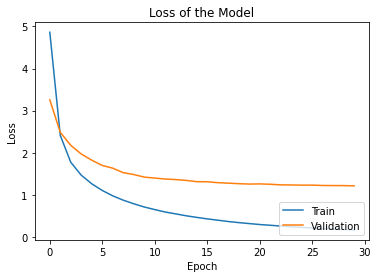

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

As we can see the Accuracy in this case results better but it is still around th 70%. To get a real improvment we can use, for example, fine tuning which could be very useful in this task. 

In [ ]:
from sklearn.metrics import classification_report

Y_prediction = model.predict(test_images)
Y_pred_classes = np.argmax(Y_prediction,axis=1) 
Y_true = np.argmax(test_labels,axis=1)
class_report = classification_report(Y_true, Y_pred_classes, 
                                     target_names=class_names)
print(class_report)

              precision    recall  f1-score   support

   cardboard       0.73      0.81      0.77        57
       glass       0.65      0.58      0.61        69
       metal       0.65      0.57      0.61        54
       paper       0.78      0.76      0.77       111
     plastic       0.65      0.73      0.69        66
       trash       0.33      0.36      0.35        22

    accuracy                           0.68       379
   macro avg       0.63      0.63      0.63       379
weighted avg       0.68      0.68      0.68       379

